# Some Statistics with Baby Names

### Introduction:

We are going to use a subset of [US Baby Names](https://www.kaggle.com/kaggle/us-baby-names) from Kaggle.  
In the file it will be names from 2004 until 2014


### Step 1. Import the necessary libraries

In [79]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/keuperj/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: False


In [80]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


### Step 2. 
User ***Jupyter Lab*** to view ``path+"/DATA/US_Baby_Names_right.csv"``.

In [81]:
baby_names=pd.read_csv(path+'/DATA/US_Baby_Names_right.csv')

### Step 3. Assign it to a variable called baby_names.

In [82]:
baby_names

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
...,...,...,...,...,...,...,...
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5


### Step 4. See the first 10 entries

In [5]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


### Step 5. Delete the column 'Unnamed: 0' and 'Id'

In [85]:
baby_names.drop(['Unnamed: 0'], axis = 1,  inplace=True)
baby_names.drop(['Id'], axis = 1,  inplace=True)
baby_names

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


### Step 6. Are there more male or female names in the dataset?

In [119]:
baby_names.Gender.value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

### Step 7. Group the dataset by name and assign to names

In [142]:
names = baby_names.groupby(['Name'])
name_group = names.head(25)
name_order = names.Count.aggregate(np.sum)

### Step 8. How many different names exist in the dataset?

In [143]:
name_group.Name.nunique()
#name_group.loc[name_group['Name']=='Sarah']

17632

### Step 9. What is the name with most occurrences?

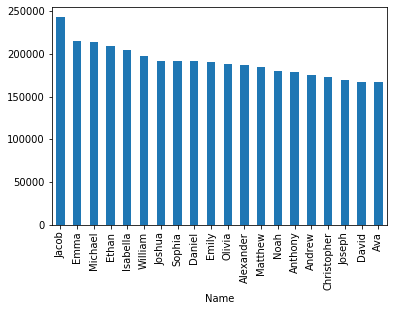

In [147]:
#names.get_group(('Sarah'))
name_order = name_order.sort_values(ascending = False)
name_order.iloc[:20].plot(kind='bar', x='Name', y='Count')
#names.iloc[:5].plot(kind='bar',x='Name',y='Count')

### Step 10. How many different names have the least occurrences?

2578

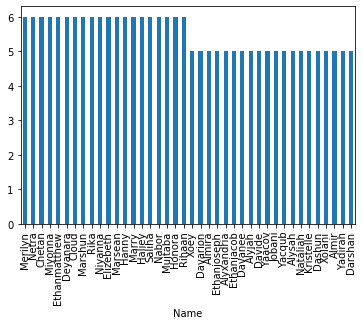

In [155]:
cut_low = name_group.Name.nunique() - name_order[name_order <= name_order.min()].count()  - 20
cut_high = name_group.Name.nunique() - name_order[name_order <= name_order.min()].count()  + 20
name_order.iloc[cut_low:cut_high].plot(kind='bar', x='Name', y='Count') # verification

name_order[name_order <= name_order.min()].count() 

### Step 11. What is the median name occurrence?

In [156]:
name_order.median()

49.0

### Step 12. What is the standard deviation of names?

In [161]:
name_order.std()

11006.0694678915

### Step 13. Get a summary with the mean, min, max, std and quartiles.

In [163]:
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Name    1016395 non-null  object
 1   Year    1016395 non-null  int64 
 2   Gender  1016395 non-null  object
 3   State   1016395 non-null  object
 4   Count   1016395 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 38.8+ MB
